<a href="https://colab.research.google.com/github/TolgonaiNk/tolgonai/blob/main/Regression_v1_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Load train and test datasets
df_train = pd.read_csv('DataUnderstanding.csv')
df_test = pd.read_csv('CleanedTest.csv')

In [ ]:
#non important features, update, to observe if results will imporve
drop_columns = ['name','artists','album_name','genre'
               ]

In [ ]:
#split train dataset into x-train and y-train
X_train = df_train.drop(drop_columns, axis=1)

#split test dataset into x-test and y-test
X_test = df_test.drop(drop_columns, axis=1)

In [ ]:
df = X_train.copy()
X = df.values

In [ ]:
df.head()

,duration_min,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing
0,4.029333,False,46,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.536000,0.281,0.635,142.221,4.0,567.0,141.0,1.279305
1,5.558433,False,3,0.363,0.854,2,-7.445,1.0,0.0397,0.000089,0.800000,0.262,0.489,116.628,4.0,652.0,162.0,3.700483
2,4.496667,False,23,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.001270,0.117,0.385,140.880,4.0,619.0,155.0,1.279305
3,5.127517,False,25,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.096900,0.299,0.637,143.956,4.0,733.0,183.0,4.067086
4,3.737767,True,32,0.642,0.972,5,-3.047,1.0,0.0967,0.001520,0.000024,0.384,0.421,118.035,4.0,432.0,106.0,1.279305


In [ ]:
#d = load_wine(as_frame=True)
#df = d["data"]
#X = df.values
#df.head()

In [ ]:
#df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)

# Simple Regression

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
x_train = df_train["energy"].values.reshape(-1, 1)
y_train = df_train["loudness"].values

x_test = df_test["energy"].values.reshape(-1, 1)
y_test = df_test["loudness"].values

## Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [11.52135239]
Intercept: 
 -15.504577468733846


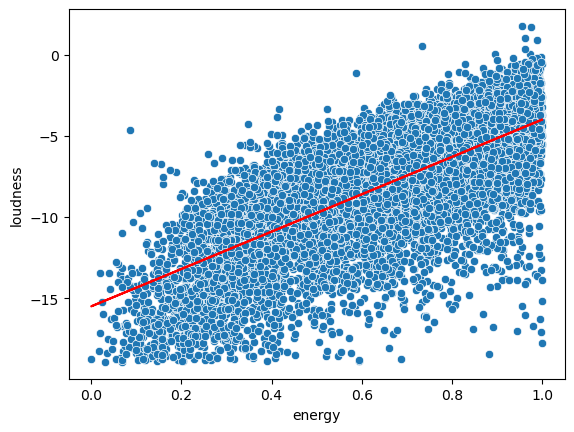

In [ ]:
sns.scatterplot(data=df_train, x="energy", y="loudness")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [ ]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.543
MSE: 6.930
MAE: 2.060


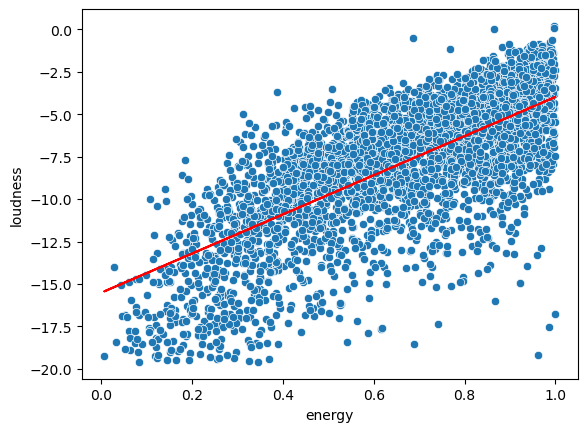

In [ ]:
sns.scatterplot(data=df_test, x="energy", y="loudness")
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

### Ridge

In [ ]:
reg = Ridge()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [11.50219906]
Intercept: 
 -15.491592375732306


In [ ]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.543
MSE: 6.931
MAE: 2.060


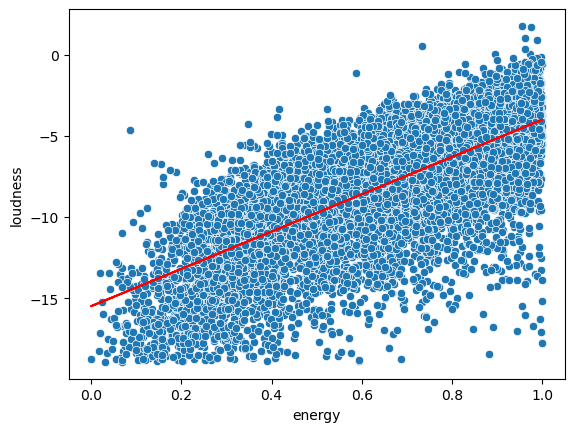

In [ ]:
sns.scatterplot(data=df_train, x="energy", y="loudness")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

### Lasso

In [ ]:
reg = Lasso()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.]
Intercept: 
 -7.693620803825991


In [ ]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.001
MSE: 15.184
MAE: 3.077


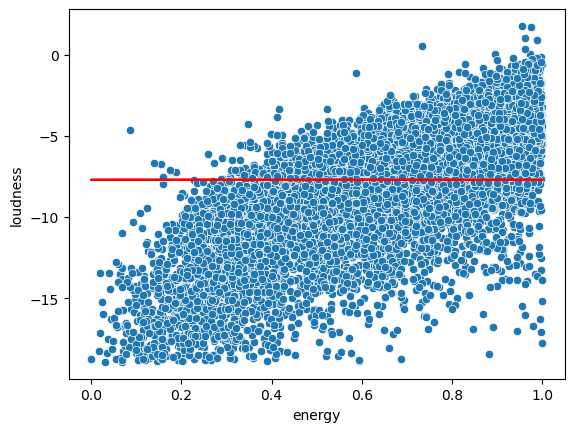

In [ ]:
sns.scatterplot(data=df_train, x="energy", y="loudness")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

## Nonlinear regression

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg = DecisionTreeRegressor()

In [ ]:
reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.518
MSE: 7.312
MAE: 2.097


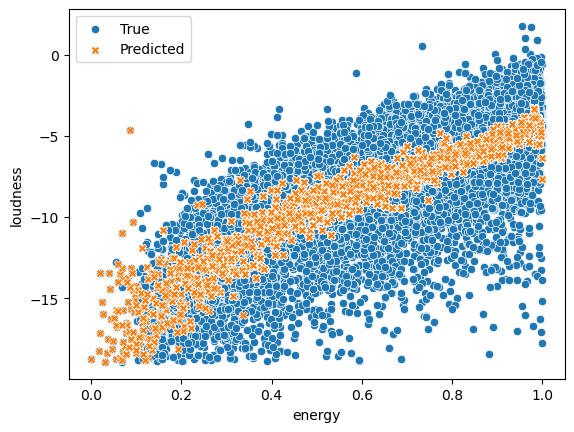

In [ ]:
sns.scatterplot(data=df_train, x="energy", y="loudness", label="True")
sns.scatterplot(data=df_train, x="energy", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
reg = KNeighborsRegressor()

In [ ]:
reg.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.485
MSE: 7.807
MAE: 2.188


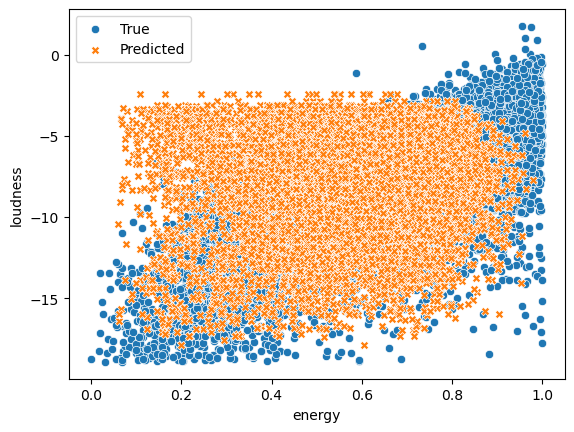

In [ ]:
sns.scatterplot(data=df_train, x="energy", y="loudness", label="True")
sns.scatterplot(data=df_train, x="danceability", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

# Multiple Regression

In [ ]:
X_train = df_train[["loudness", "acousticness"]].values
y_train = df_train["energy"].values

X_test = df_test[["loudness", "acousticness"]].values
y_test = df_test["energy"].values


#X_train = df_train[["n_beats", "n_bars"]].values
#y_train = df_train["duration_min"].values

#X_test = df_test[["n_beats", "n_bars"]].values
#y_test = df_test["duration_min"].values


## Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.698
MSE: 0.017
MAE: 0.103


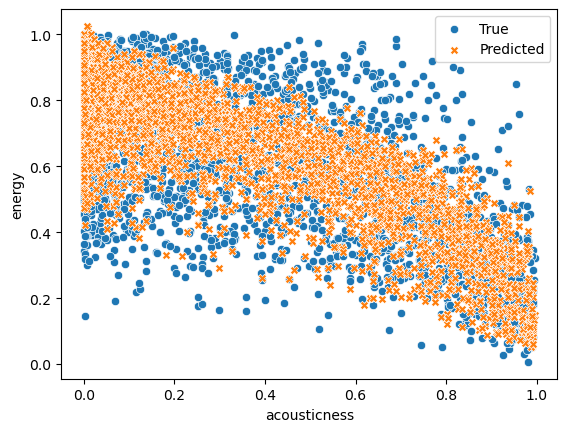

In [ ]:
sns.scatterplot(data=df_test, x="acousticness", y="energy", label="True")
sns.scatterplot(data=df_test, x="acousticness", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

## Nonlinear Regression

In [ ]:
reg = DecisionTreeRegressor()

In [ ]:
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.456
MSE: 0.031
MAE: 0.133


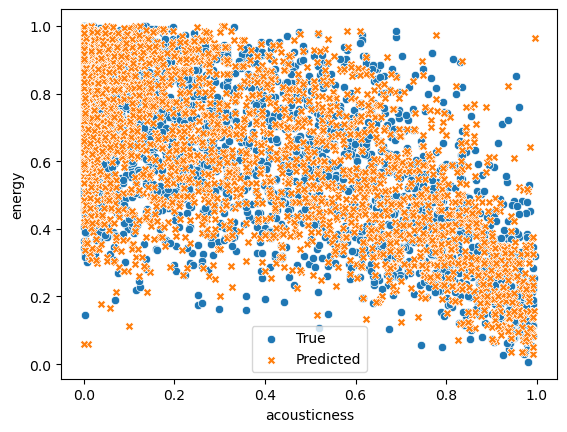

In [ ]:
#sns.scatterplot(data=df_test, x="hue", y="duration_min", label="True")
#sns.scatterplot(data=df_test, x="hue", y=reg.predict(X_test), label="Predicted", marker="X")
#plt.legend()
#plt.show()

# Assuming 'duration_min' is your target variable and 'reg' is your linear regression model
#sns.scatterplot(data=df_test, x="n_beats", y="duration_min", label="True")
sns.scatterplot(data=df_test, x="acousticness", y="energy", label="True")
sns.scatterplot(data=df_test, x="acousticness", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

# Multivariate Regression (2+ target variables)

In [ ]:
X_train = df_train[["n_beats", "n_bars","loudness","acousticness"]].values
y_train = df_train[["duration_min","energy"]].values

X_test = df_test[["n_beats", "n_bars","loudness","acousticness"]].values
y_test = df_test[["duration_min","energy"]].values

In [ ]:
reg = DecisionTreeRegressor()

In [ ]:
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.426
MSE: 0.480
MAE: 0.437


In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([[2.68888333, 0.949     ],
       [5.80376667, 0.348     ],
       [1.8735    , 0.863     ],
       ...,
       [4.57176667, 0.793     ],
       [4.05488333, 0.978     ],
       [5.984     , 0.968     ]])

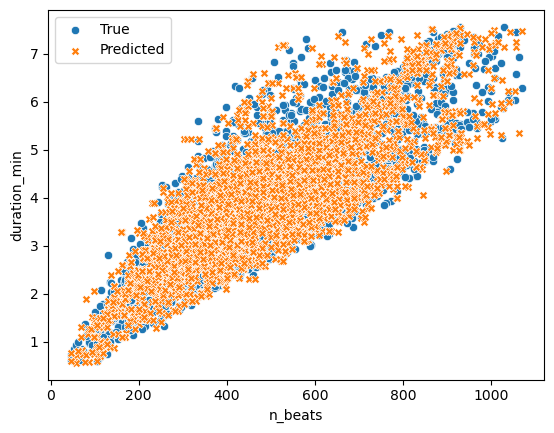

In [ ]:
sns.scatterplot(data=df_test, x="n_beats", y="duration_min", label="True")
sns.scatterplot(data=df_test, x="n_beats", y=reg.predict(X_test)[:, 0], label="Predicted", marker="X")
plt.legend()
plt.show()

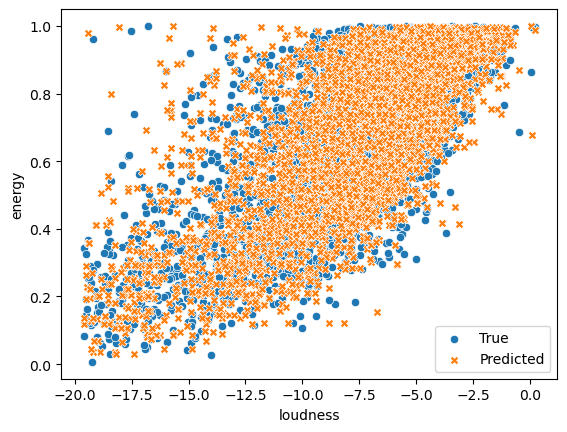

In [ ]:
sns.scatterplot(data=df_test, x="loudness", y="energy", label="True")
sns.scatterplot(data=df_test, x="loudness", y=reg.predict(X_test)[:, 1], label="Predicted", marker="X")
plt.legend()
plt.show()